In [ ]:
'''
PPCA 2.0 Data Cleaning / Filter

The script processes and filter spatial data from OSM and GHS sources for further analysis. It performs four main tasks: (1) It reads and filters 
Global Human Settlement (GHS) data by rounding values and removing meshes with zero population (2) It filters OpenStreetMap (OSM) streets data to 
separate pedestrian and non-pedestrian streets (3) It filters OSM land use data to identify non-populated areas.

Requirements:
- A specific working environment (see github page of the project)
- Geopackage file from PPCA 1.0

Guide to run the script:
- Fill 0.2 box

Author : Perez, Joan 
'''

In [1]:
# 0.1 : libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 0.2 : Box to fil with informations

# Name of the case study
Name = 'Nice'

# Recall the ghs date (extracted in previous step)
ghs_date = 2020

# Define projected CRS
projected_crs = 'EPSG:2154'

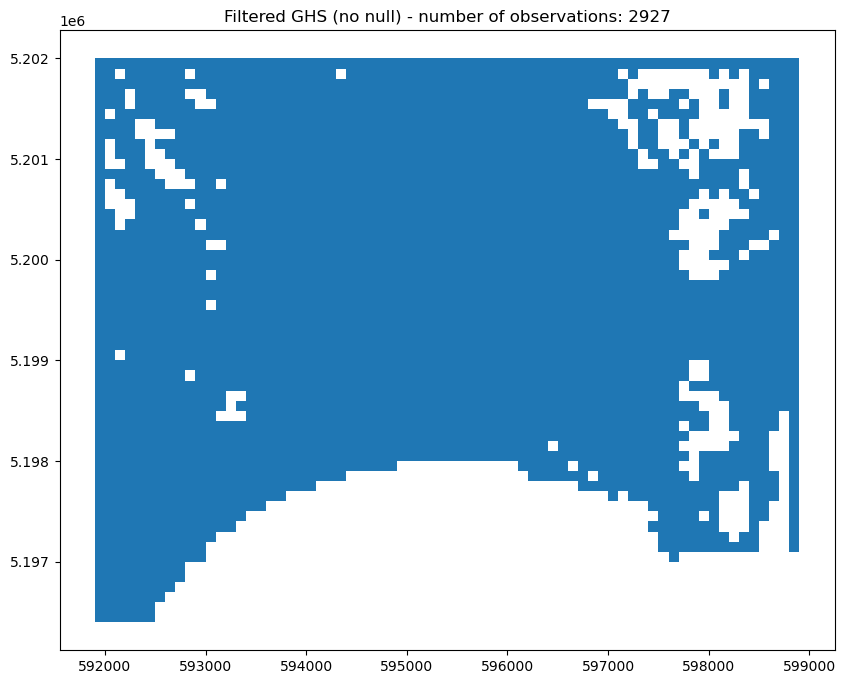

In [3]:
# 1. FILTER GHS DATA
gpkg = f'PPCA1_{Name}.gpkg'
gpkg2 = f'PPCA2_{Name}.gpkg'
ghs_vector = gpd.read_file(gpkg, layer = f'ghs_{ghs_date}_vector')

# Round the values in the "values" column
ghs_vector['VALUE'] = ghs_vector['VALUE'].round()

# Filter out rows with a value of 0
ghs_vector = ghs_vector[ghs_vector['VALUE'] != 0]

# Save & plot
ghs_vector.to_file(gpkg2, layer = f'ghs_populated_{ghs_date}_vector', driver="GPKG")
num_observations = len(ghs_vector)
fig, ax = plt.subplots(figsize=(10, 10))
ghs_vector.plot(ax=ax)
ax.set_title(f'Filtered GHS (no null) - number of observations: {num_observations}')
plt.show()

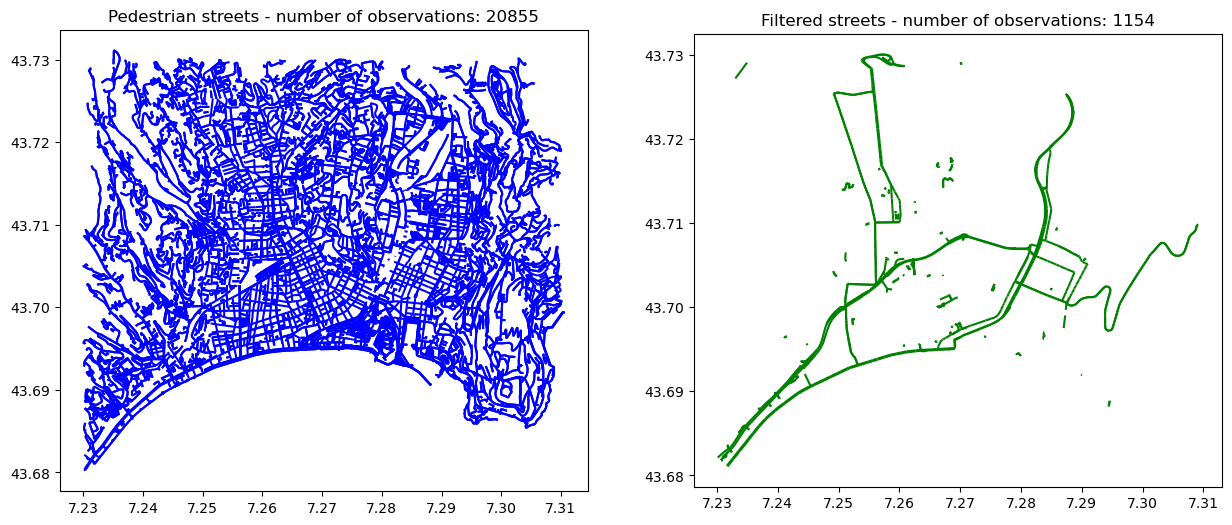

In [4]:
# 2. FILTER OSM STREETS DATA
linestrings_gdf = gpd.read_file(gpkg, layer = 'osm_all_streets')

# Remove non-pedestrian streets
removed_streets = linestrings_gdf[
    linestrings_gdf['highway'].str.contains('motorway|motorway_link|primary|primary_link|trunk|trunk_link', na=False) |
    (linestrings_gdf['tunnel'] == 'yes')
]

# Keep pedestrian streets
pedestrian_streets = linestrings_gdf[
    ~linestrings_gdf['highway'].str.contains('motorway|motorway_link|primary|primary_link|trunk|trunk_link', na=False) &
    (linestrings_gdf['tunnel'] != 'yes')
]

# Plot pedestrian_streets & non-pedestrian streets
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
num_observations = len(pedestrian_streets)
pedestrian_streets.plot(ax=axes[0], color='blue')
axes[0].set_title(f'Pedestrian streets - number of observations: {num_observations}')
num_observations = len(removed_streets)
removed_streets.plot(ax=axes[1], color='green')
axes[1].set_title(f'Filtered streets - number of observations: {num_observations}')
plt.show()

# Save
pedestrian_streets.to_file(gpkg2, layer='pedestrian_streets', driver="GPKG")
removed_streets.to_file(gpkg2, layer='non_pedestrian_streets', driver="GPKG")

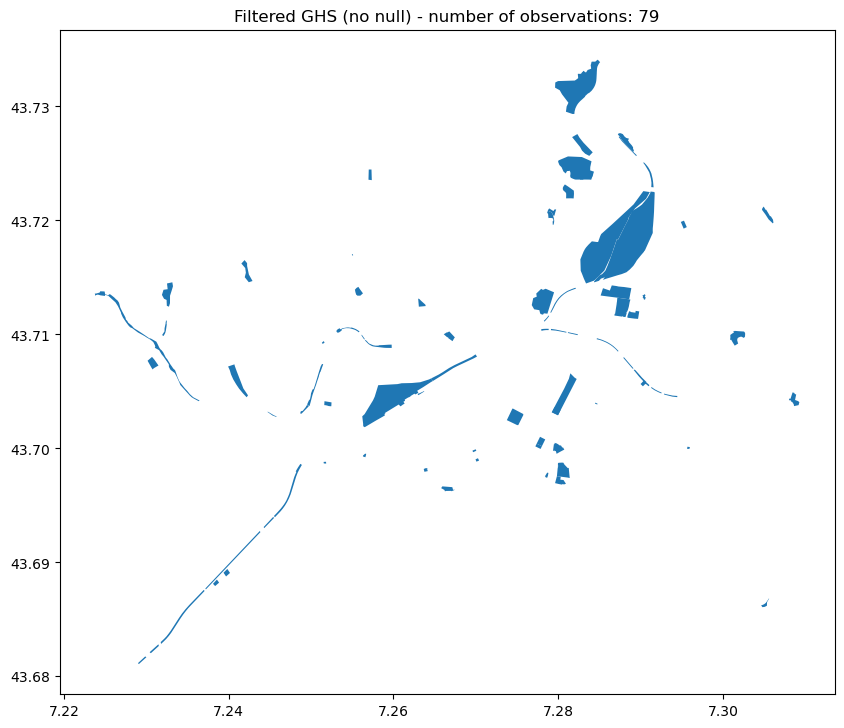

In [5]:
# 3. FILTER OSM LANDUSE DATA
all_areas = gpd.read_file(gpkg, layer = 'osm_all_area_categories')

# Remove non-populated landuse areas
non_populated_areas = all_areas[
    all_areas['landuse'].str.contains(
        'construction|cemetery|education|healthcare|industrial|military|railway|religious|port|winter_sports', 
        na=False
    )
]

# Save & plot
non_populated_areas.to_file(gpkg2, layer='osm_non_populated_areas', driver="GPKG")
num_observations = len(non_populated_areas)
fig, ax = plt.subplots(figsize=(10, 10))
non_populated_areas.plot(ax=ax)
ax.set_title(f'Filtered GHS (no null) - number of observations: {num_observations}')
plt.show()